## 9.2 Exercise

### 1. Summarizing Data

In [1]:
#imports libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

In [2]:
#reads the file qb_stats
qb =pd.read_csv('qb_stats.csv')

In [3]:
#find the mean of each numerical column
mean_values = qb.mean(numeric_only='None')
print("1. The mean values of the numerical columns are:")
print(mean_values)

1. The mean values of the numerical columns are:
games         14.125000
att          478.406250
cmp          306.562500
comp_pct      64.296875
yds         3515.062500
ypa            7.375000
td            22.375000
int           10.343750
sack          32.312500
loss         217.093750
rating        93.387500
dtype: float64


In [4]:
#find the standard deviation of each numerical column
std_values = qb.std(numeric_only='None')
print("2. The standard deviation of each numerical column are:")
print(std_values)

2. The standard deviation of each numerical column are:
games         2.406309
att         110.360366
cmp          68.929575
comp_pct      3.627537
yds         852.437489
ypa           0.796768
td            6.256609
int           5.839849
sack         10.514008
loss         70.786075
rating       11.054725
dtype: float64


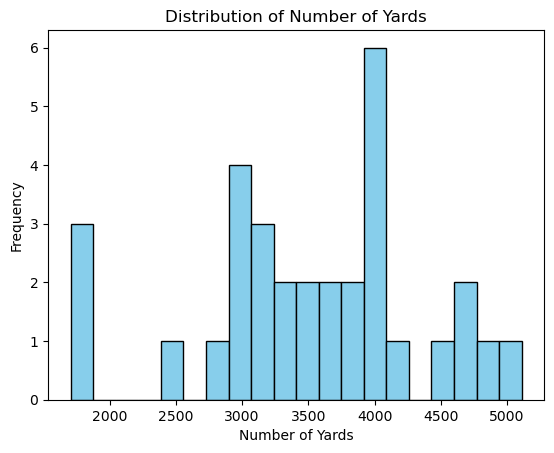

In [5]:
#Creates a histogram of the number of yards
plt.hist(qb.yds, bins=20, color='skyblue',edgecolor='black')
plt.xlabel("Number of Yards")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Yards")
plt.show()

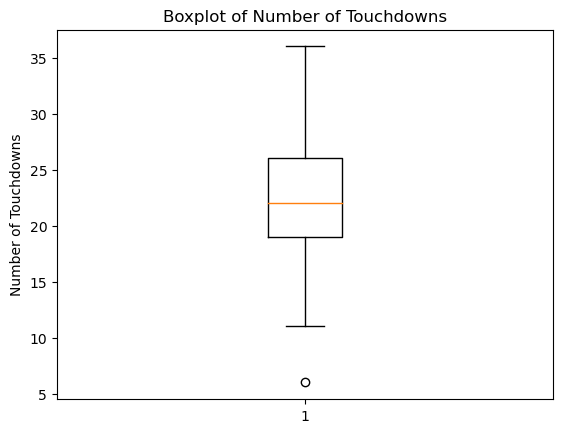

In [6]:
#Creats a boxplot of the number of touchdowns.
plt.boxplot(qb.td)
plt.ylabel("Number of Touchdowns")
plt.title("Boxplot of Number of Touchdowns")
plt.show()

## 2. Calculating Probabilities from Data

In [7]:
#reads the file survey_data.csv
survey = pd.read_csv('survey_data.csv')

In [8]:
# Count the number of students with each hair color
hair_counts = survey.hair_color.value_counts()

# Calculate the probability of a student having brown hair
prob_brown_hair = hair_counts['brown'] / survey.shape[0]

# Count the number of students with each eye color
eye_counts = survey.eye_color.value_counts()

# Calculate the probability of a student having blue eyes
prob_blue_eyes = eye_counts['blue'] / survey.shape[0]

# Count the number of students with brown hair and blue eyes
both_counts = survey[(survey.hair_color == 'brown') & (survey.eye_color == 'blue')].shape[0]

# Calculate the probability of a student having blue eyes given brown hair
prob_blue_eyes_given_brown_hair = both_counts / hair_counts['brown']

# Calculate the probability of a student having brown hair given blue eyes
prob_brown_hair_given_blue_eyes = both_counts / eye_counts['blue']

print("1. Probability of a college student having brown hair:", prob_brown_hair)
print("2. Probability of a college student having blue eyes:", prob_blue_eyes)
print("3. Probability of a college student having blue eyes given brown hair:", prob_blue_eyes_given_brown_hair)
print("4. Probability of a college student having brown hair given blue eyes:", prob_brown_hair_given_blue_eyes)


1. Probability of a college student having brown hair: 0.5123456790123457
2. Probability of a college student having blue eyes: 0.24691358024691357
3. Probability of a college student having blue eyes given brown hair: 0.21686746987951808
4. Probability of a college student having brown hair given blue eyes: 0.45


5. I think because having blue eyes and blue eyes given brown hair are not equal they would not not be independent on each other.

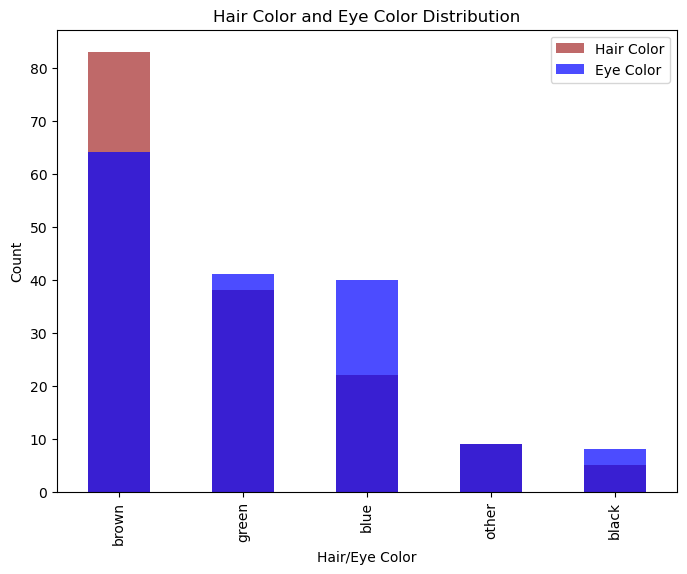

In [9]:
# Create a bar graph
plt.figure(figsize=(8, 6))
hair_counts.plot(kind='bar', color='brown', alpha=0.7, label='Hair Color')
eye_counts.plot(kind='bar', color='blue', alpha=0.7, label='Eye Color')
plt.xlabel('Hair/Eye Color')
plt.ylabel('Count')
plt.title('Hair Color and Eye Color Distribution')
plt.legend()
plt.show()

### 3. Using the Binomial Distribution

1.

In [10]:
n = 15  # Total number of individual models
p = 0.63  # Accuracy of each individual model

# Calculate the probability 
ensemble_accuracy = 1 - binom.cdf(n // 2, n, p)

print("Ensemble model accuracy:", ensemble_accuracy)


Ensemble model accuracy: 0.8512830492077244


2.

In [11]:
target_accuracy = 0.95  # Desired ensemble model accuracy

# Find the smallest accuracy percentage of individual models that satisfies the target ensemble accuracy
individual_accuracy = 0
while True:
    individual_accuracy += 1
    p = individual_accuracy / 100.0

    ensemble_accuracy = 1 - binom.cdf(n // 2, n, p)
    if ensemble_accuracy >= target_accuracy:
        break

print("Accuracy of individual models:", individual_accuracy, "%")


Accuracy of individual models: 71 %


3.

In [12]:
# Find the smallest odd number of individual models that satisfies the target ensemble accuracy
n = 1
while True:
    p = 0.63

    ensemble_accuracy = 1 - binom.cdf(n // 2, n, p)
    if ensemble_accuracy >= target_accuracy:
        break

    n += 2  # Increment by 2 to keep the number odd

print("Number of individual models needed:", n)

Number of individual models needed: 39


### 4. Working with Random Data

1.

In [13]:
#define x values
X = np.array([1,2,3,4,5])

#probability mass function
def create_pmf():
    pmf = {1: 0.1, 2: 0.2, 3: 0.3, 4: 0.25, 5: 0.15}
    return pmf

#prints results
pmf = create_pmf()
print(pmf)

{1: 0.1, 2: 0.2, 3: 0.3, 4: 0.25, 5: 0.15}


2.

In [14]:
#function to generate 50 random x values
def generate_random_values(pmf, num_values):
    values = np.random.choice(list(pmf.keys()), size=num_values, p=list(pmf.values()))
    return np.mean(values)

#prints results
mean_of_random_values = generate_random_values(pmf, 50)
print("The mean values of 50 random X values is ",mean_of_random_values)

The mean values of 50 random X values is  3.4


3.

In [15]:
#runs the f
def run_simulation(pmf, num_simulations, num_values):
    means = []
    for _ in range(num_simulations):
        mean = generate_random_values(pmf, num_values)
        means.append(mean)
    return means

4.

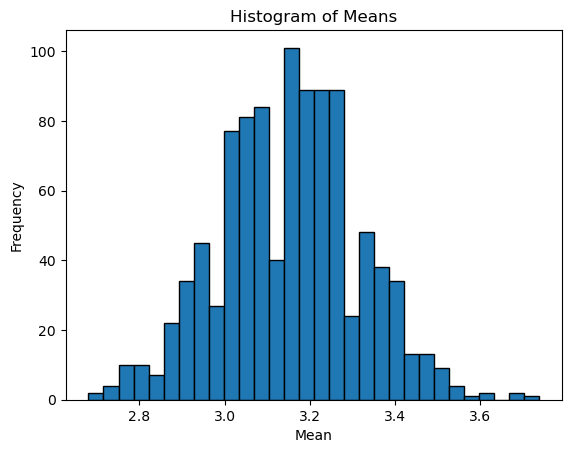

In [16]:
#creats histogram of the means 
means = run_simulation(pmf, 1000, 50)

plt.hist(means, bins=30, edgecolor='black')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Means')
plt.show()

This histogram appears to follow a normal distribution, which is a pattern predicted by the Central Limit Theorem. This rule suggests that when taking the average of many different measurements, no matter the original shape of the data, it tends to take on a normal shape over time.

5.

In [17]:
#find mean and standard deviation of the list of means
mean_of_means = np.mean(means)
std_of_means = np.std(means)

print("Mean of means:", mean_of_means)
print("Standard deviation of means:", std_of_means)

Mean of means: 3.1510599999999998
Standard deviation of means: 0.16523339977135373


In [19]:
#find the theoretical values
def calculate_theoretical_values(pmf):
    theoretical_mean = sum(x * p for x, p in pmf.items())
    theoretical_variance = sum(((x - theoretical_mean) ** 2) * p for x, p in pmf.items())
    theoretical_std_dev = theoretical_variance ** 0.5
    return theoretical_mean, theoretical_std_dev

#print results
theoretical_mean, theoretical_std_dev = calculate_theoretical_values(pmf)
print("Theoretical Mean:", theoretical_mean)
print("Theoretical Standard Deviation:", theoretical_std_dev)


Theoretical Mean: 3.15
Theoretical Standard Deviation: 1.1947803145348521
